In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

### Part A: Data Cleaning

In [43]:
# Import full data set using Pandas and verify the shape
df = pd.read_csv('bottle.csv')
df.shape

(864863, 74)

In [44]:
# Limit the dataset to specific columns
df = df[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]

In [45]:
# Remove NaN / NA values from dataset
df = df.dropna()
df.shape

(661268, 5)

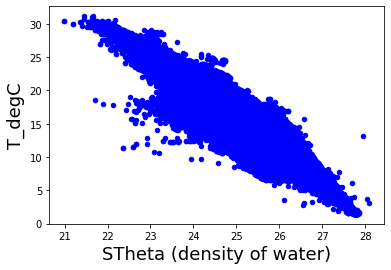

In [46]:
# Scatter: STheta (density of water) vs T_degC
df.plot.scatter(x='STheta', y='T_degC', color="b")
plt.xlabel('STheta (density of water)', fontsize=18)
plt.ylabel('T_degC',fontsize=18)
plt.show()

In [47]:
# Remove obvious outliers
df = df.loc[(df['STheta'] < 100)]
df.shape

(661268, 5)

### Part B: Train / Test Split & Scaling

In [48]:
df.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
2160,10.30,33.030,25.364,5.90,0
2161,18.46,32.920,23.568,6.02,6
2162,10.29,32.951,25.304,6.04,10
2163,10.29,32.990,25.335,6.06,15
2164,10.33,33.005,25.339,6.04,20


In [49]:
# Create X & y objects and reshape y
cols = list(df.columns.values) 
cols.pop(cols.index('T_degC')) 
X = df[cols] 
y = df["T_degC"]

y = y.values.reshape(661268, 1)

In [50]:
print(X.shape, y.shape)

(661268, 4) (661268, 1)


In [51]:
# Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Scale all features to improve convergence in Gradient Descent
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

In [53]:
print(X_train_scaled.shape, X_test_scaled.shape)

(529014, 4) (132254, 4)


### Part C: Linear Regression with sklearn

In [54]:
# Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [55]:
# Print out the coefficients and the intercept
print('the intercept is:', lin_reg.intercept_)
print('the four coefficients are:', lin_reg.coef_)

the intercept is: [10.91541795]
the four coefficients are: [[ 1.63046569 -4.6345913   0.3020677  -0.47495536]]


In [56]:
# Predict T_degC for the test data using the fitted values in b
y_pred_sklearn = lin_reg.predict(X_test_scaled)
print(np.concatenate((y_pred_sklearn.reshape(len(y_pred_sklearn),1), y_test.reshape(len(y_test),1)),1))

[[16.68757262 16.76      ]
 [ 8.62255144  8.2       ]
 [10.69854382 10.94      ]
 ...
 [ 6.16833123  6.1       ]
 [10.94458735 11.1       ]
 [16.36913142 16.5       ]]


In [57]:
# Calculate the parameters for the test data
print('mean squared error:', mean_squared_error(y_test,y_pred_sklearn))
print('r-squared:', r2_score(y_test,y_pred_sklearn))
print('explained variance:', explained_variance_score(y_test,y_pred_sklearn))

mean squared error: 0.11121967155279679
r-squared: 0.99375654598565
explained variance: 0.9937629850032851


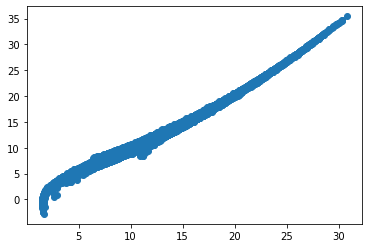

In [58]:
# Create a scatterplot that shows actual versus predicted values for the T_degC
plt.scatter(y_test,y_pred_sklearn)

### Part D: Gradient Descent Mini-Batch

#### Batch Size: 50

In [59]:
# Add a column of 1s to X_train_scaled and X_test_scaled
print('X_train_scaled shape is:', X_train_scaled.shape)
X_train_scaled_shape = X_train_scaled.shape[0]
X_train_scaled_b = np.c_[np.ones((X_train_scaled_shape, 1)), X_train_scaled]
print('new X_train_scaled is:\n', X_train_scaled_b)

print('X_test_scaled shape is:', X_test_scaled.shape)
X_test_scaled_shape = X_test_scaled.shape[0]
X_test_scaled_b = np.c_[np.ones((X_test_scaled_shape, 1)), X_test_scaled]
print('new X_test_scaled is:\n', X_test_scaled_b)

X_train_scaled shape is: (529014, 4)
new X_train_scaled is:
 [[ 1.         -0.94801805 -0.33072186  0.80884944 -0.22441603]
 [ 1.          0.62640206  0.87719897 -0.85837645  0.31487462]
 [ 1.         -1.39537053 -0.99210802  1.19062    -0.61604377]
 ...
 [ 1.         -1.05659875 -1.19705852  1.15195969 -0.6481444 ]
 [ 1.          1.45595859  1.4712584  -1.53009935  1.86212518]
 [ 1.         -1.39537053  0.18511974  1.11329938 -0.30787768]]
X_test_scaled shape is: (132254, 4)
new X_test_scaled is:
 [[ 1.         -1.58960295 -1.66688778  1.15429535 -0.61043374]
 [ 1.          0.1744444   0.59194681  0.22489227 -0.20677048]
 [ 1.         -0.13877732  0.0334383  -0.07038683 -0.39084093]
 ...
 [ 1.          1.05755565  1.20204048 -1.49837594  0.9428625 ]
 [ 1.         -0.44764874 -0.10346076  0.64602804 -0.17770672]
 [ 1.         -1.58960295 -1.60637443  1.13009215 -0.54584762]]


In [60]:
# The cost function we will use for Gradient Descent is MSE
def MSE_cal(X,y,theta):
    MSE = (1/len(y))*sum((X.dot(theta) - y)**2)
    return MSE

In [61]:
# Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.
def mini_batch_gradient_descent(X, y, batch_size, n_epochs = 100, eta = 0.1):

    total_samples = len(X_train_scaled_b)
    number_of_features = X.shape[1]
    minibatch_size = batch_size

    np.random.seed(42)
    theta = np.random.randn(number_of_features,1)  # random initialization

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(total_samples)
        X_tmp = X[shuffled_indices]
        y_tmp = y[shuffled_indices]
        for i in range(0, total_samples, minibatch_size):
            xi = X_tmp[i:i+minibatch_size]
            yi = y_tmp[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * gradients
    return theta

In [62]:
'''Order of the output: 
intercept
'Salnty' 
'STheta' 
'O2ml_L' 
'Depthm
'''
theta_batch50 = mini_batch_gradient_descent(X_train_scaled_b, y_train, batch_size=50)
theta_batch50

array([[10.94831182],
       [ 1.66596957],
       [-4.69795046],
       [ 0.34369036],
       [-0.37783529]])

In [63]:
# Calculate the parameters
def pred_mse_r2_evs(X,y,theta):
    y_pred = X.dot(theta)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    evs = explained_variance_score(y, y_pred)
    return y_pred, mse, r2, evs

In [64]:
y_pred_batch50, mse_batch50, r2_batch50, evs_batch50 = pred_mse_r2_evs(X_test_scaled_b,y_test,theta_batch50)

In [65]:
print(f'MSE: {mse_batch50}')
print(f'R2_score: {r2_batch50}')
print(f'Explained variance: {evs_batch50}')

MSE: 0.11816292000137646
R2_score: 0.9933667781343906
Explained variance: 0.9933944042336643


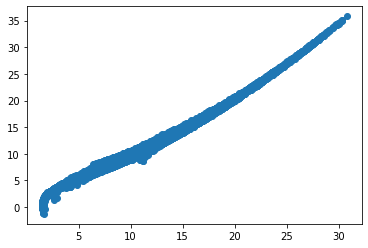

In [66]:
# Create a scatterplot that shows actual versus predicted values for the T_degC for the test data
plt.scatter(y_test, y_pred_batch50)
plt.show()

In [68]:
# Check how our error metrics look for training data
y_train_pred_batch50, train_mse_batch50, train_r2_batch50, train_evs_batch50 = pred_mse_r2_evs(X_train_scaled_b,y_train,theta_batch50)

In [69]:
print(f'MSE: {train_mse_batch50}')
print(f'R2_score: {train_r2_batch50}')
print(f'Explained variance: {train_evs_batch50}')

MSE: 0.11816655068263593
R2_score: 0.9933818028460155
Explained variance: 0.9934424032236259


#### Batch Size: 250

In [71]:
'''Order of the output: 
intercept
'Salnty' 
'STheta' 
'O2ml_L' 
'Depthm
'''
theta_batch250 = mini_batch_gradient_descent(X_train_scaled_b, y_train, batch_size=250)
theta_batch250

array([[10.93058366],
       [ 1.64538769],
       [-4.65645869],
       [ 0.31138468],
       [-0.43051971]])

In [72]:
y_pred_batch250, mse_batch250, r2_batch250, evs_batch250 = pred_mse_r2_evs(X_test_scaled_b,y_test,theta_batch250)

In [73]:
print(f'MSE: {mse_batch250}')
print(f'R2_score: {r2_batch250}')
print(f'Explained variance: {evs_batch250}')

MSE: 0.11225340656483469
R2_score: 0.993698515990411
Explained variance: 0.993699630500322


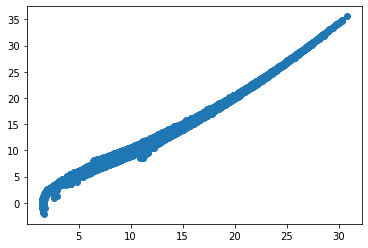

In [74]:
plt.scatter(y_test, y_pred_batch250)
plt.show()

In [75]:
y_train_pred_batch250, train_mse_batch250, train_r2_batch250, train_evs_batch250 = pred_mse_r2_evs(X_train_scaled_b,y_train,theta_batch250)

In [76]:
print(f'MSE: {train_mse_batch250}')
print(f'R2_score: {train_r2_batch250}')
print(f'Explained variance: {train_evs_batch250}')

MSE: 0.11223316404030885
R2_score: 0.993714116198338
Explained variance: 0.9937269978268318


#### Batch Size: 2000

In [78]:
'''Order of the output: 
intercept
'Salnty' 
'STheta' 
'O2ml_L' 
'Depthm
'''
theta_batch2000 = mini_batch_gradient_descent(X_train_scaled_b, y_train, batch_size=2000)
theta_batch2000

array([[10.91728431],
       [ 1.63566517],
       [-4.63842578],
       [ 0.29970095],
       [-0.46759502]])

In [79]:
y_pred_batch2000, mse_batch2000, r2_batch2000, evs_batch2000 = pred_mse_r2_evs(X_test_scaled_b,y_test,theta_batch2000)

In [80]:
print(f'MSE: {mse_batch2000}')
print(f'R2_score: {r2_batch2000}')
print(f'Explained variance: {evs_batch2000}')

MSE: 0.11112202732331851
R2_score: 0.9937620273654095
Explained variance: 0.9937664177423069


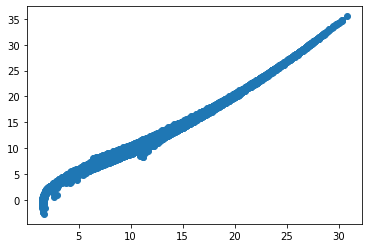

In [81]:
plt.scatter(y_test, y_pred_batch2000)
plt.show()

In [82]:
y_train_pred_batch2000, train_mse_batch2000, train_r2_batch2000, train_evs_batch2000 = pred_mse_r2_evs(X_train_scaled_b,y_train,theta_batch2000)

In [83]:
print(f'MSE: {train_mse_batch2000}')
print(f'R2_score: {train_r2_batch2000}')
print(f'Explained variance: {train_evs_batch2000}')

MSE: 0.1107041812493561
R2_score: 0.9937997504958369
Explained variance: 0.9937999455871723


### Part E: Conceptual Questions

1. Describe how parameter estimation in Gradient Descent differs from using the normal equation.

---- Gradient descent is an optimization algorithm used to find the values of parameters of a function that minimizes a cost function. It is an iterative algorithm. 

---- However, normal equation performs minimization without iteration. Those are equations obtained by setting equal to zero the partial derivatives of the sum of squared errors or cost function. 

2. We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

---- Stochastic Gradient Descent calculates the error and updates the model for each example in the training dataset. It computes gradient using a single Training sample. 

---- Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

3. Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain

In [84]:
pd.DataFrame([[mse_batch50,train_mse_batch50],[mse_batch250,train_mse_batch250],[mse_batch2000,train_mse_batch2000]],columns=['Test Data MSE','Train Data MSE'],index=['Batch 50','Batch 250','Batch2000'])

,Test Data MSE,Train Data MSE
Batch 50,0.118163,0.118167
Batch 250,0.112253,0.112233
Batch2000,0.111122,0.110704


---- The best-performing version of Mini-Batch Gradient Descent is with mini-batch size of 2000.

This version of gradient descent does have lower MSE in the training data compared with the test data, which means there is a sign of overfitting here. However, since the error metrics are very similar for test data and traning data, I would say that there might be a tiny issue of overfitting but not very serious. 

4. Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

---- Learning rate is a parameter that controls how much we are adjusting the weights of the network with respect the loss gradient. In other words, the lower the value, the slower we "travel along" the downward slope. It also affects how quickly our model can converge to a local minima. If the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny.
If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse. Thus, the training we performs should start from a relatively large learning rate and decrease during training to allow more fine-grained weight updates. 

5. Why would a data scientist want to use early stopping in gradient descent? 

---- Early stopping is a form of regularization used to avoid overfitting when training a model with an iterative method. Such methods update the model to make it better fit the training data with each iteration. It ensures the model not to have generalization error because of overfitting problems.